<a href="https://colab.research.google.com/github/Aarthykannan/ak/blob/main/RNN_LSTM_sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
x = np.linspace(0,50,501)

In [3]:
y = np.sin(x)

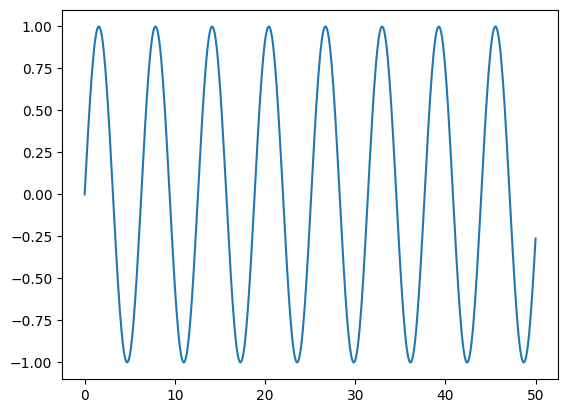

In [4]:
plt.plot(x,y)

In [5]:
df = pd.DataFrame(data = y,index = x, columns = ['sine'])

In [6]:
df.head(3)

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669


In [7]:
len(df)

501

In [8]:
test_percent = 0.1

In [9]:
test_pt = np.round(len(df) * test_percent)

In [10]:
test_pt

50.0

In [11]:
test_ind = int(len(df) - test_pt)

In [12]:
test_ind

451

In [13]:
train = df.iloc[ : test_ind]
test = df.iloc[test_ind : ]

In [14]:
# train

In [15]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()


In [16]:
train_sc = mm.fit_transform(train)
test_sc = mm.transform(test)

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator as tsg

In [18]:
length = 2
batch = 1

gen = tsg(train_sc,train_sc,length=length,batch_size = batch)

In [19]:
len(train_sc)

451

In [20]:
len(gen)

449

In [21]:
x,y = gen[0]

In [22]:
x

array([[[0.49999912],
        [0.54991622]]])

In [23]:
y

array([[0.59933458]])

In [24]:
# train_sc

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN, LSTM

In [26]:
n_fea = 1

In [27]:
length = 50
model = Sequential()
model.add(SimpleRNN(50,input_shape = (length,n_fea)))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit_generator(gen,epochs=5)

Epoch 1/5


<ipython-input-28-c8f99cc39437>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(gen,epochs=5)


449/449 [==============================] - 1s 2ms/step - loss: 0.0215
Epoch 2/5
449/449 [==============================] - 1s 2ms/step - loss: 0.0044
Epoch 3/5
449/449 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 4/5
449/449 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 5/5
449/449 [==============================] - 1s 3ms/step - loss: 0.0018


<Axes: >

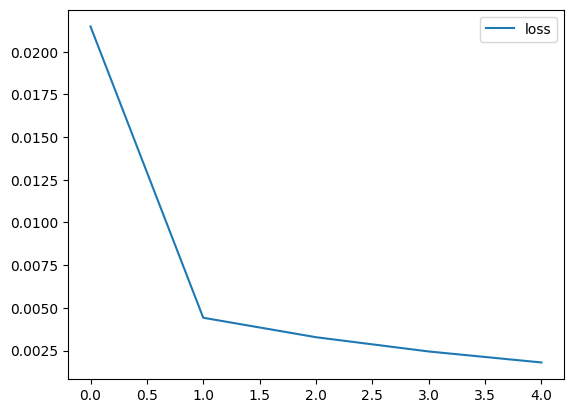

In [29]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [30]:
# SimpleRNN gen

test_pred = []
f_e_b = train_sc[-length:]
current_bt = f_e_b.reshape(1,length,n_fea)

for i in range(len(test)):

  current_pred = model.predict(current_bt)[0]
  test_pred.append(current_pred)
  current_bt = np.append(current_bt[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 15ms/step


In [31]:
true_pred = mm.inverse_transform(test_pred)

In [32]:
# true_pred

In [33]:
test['pred'] = true_pred

<ipython-input-33-b8cbedb3e41b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = true_pred


In [34]:
# test

<Axes: >

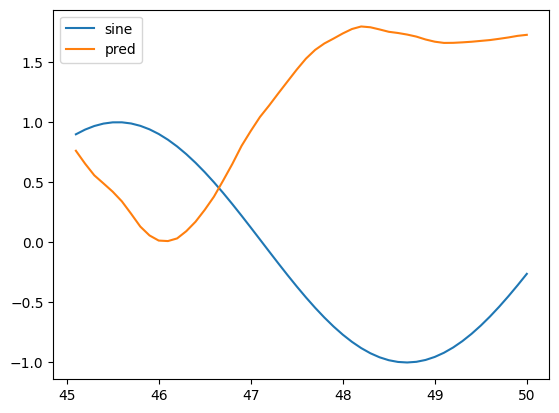

In [35]:
test.plot()

In [36]:
# LSTM

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss',patience = 2)
length = 49
gen = tsg(train_sc,train_sc,length = length,batch_size = 1)
valid_gen = tsg(test_sc,test_sc,length=length,batch_size = 1)


In [37]:
model = Sequential()
model.add(LSTM(50,input_shape = (length,n_fea)))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mse')
# model.summary()

In [38]:
model.fit_generator(gen,epochs=10,validation_data = valid_gen,callbacks=[es])

Epoch 1/10


<ipython-input-38-a3d343a53519>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(gen,epochs=10,validation_data = valid_gen,callbacks=[es])


402/402 [==============================] - 6s 11ms/step - loss: 0.0258 - val_loss: 4.6028e-05
Epoch 2/10
402/402 [==============================] - 6s 16ms/step - loss: 1.3736e-04 - val_loss: 1.9147e-05
Epoch 3/10
402/402 [==============================] - 8s 21ms/step - loss: 1.6367e-04 - val_loss: 5.0687e-05
Epoch 4/10
402/402 [==============================] - 9s 23ms/step - loss: 1.5614e-04 - val_loss: 1.7028e-05
Epoch 5/10
402/402 [==============================] - 6s 14ms/step - loss: 2.9572e-04 - val_loss: 5.1308e-06
Epoch 6/10
402/402 [==============================] - 6s 15ms/step - loss: 2.8268e-04 - val_loss: 4.7905e-06
Epoch 7/10
402/402 [==============================] - 5s 14ms/step - loss: 4.3184e-05 - val_loss: 3.9299e-06
Epoch 8/10
402/402 [==============================] - 5s 13ms/step - loss: 2.1216e-04 - val_loss: 4.1153e-06
Epoch 9/10
402/402 [==============================] - 5s 13ms/step - loss: 1.6931e-04 - val_loss: 6.9961e-06


In [39]:
# LSTM gen

test_pred = []
f_e_b = train_sc[-length:]
current_bt = f_e_b.reshape(1,length,n_fea)

for i in range(len(test)):

  current_pred = model.predict(current_bt)[0]
  test_pred.append(current_pred)
  current_bt = np.append(current_bt[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


In [42]:
true_pred = mm.inverse_transform(test_pred)
test['lstm_pred'] = true_pred
test.head(4)

<ipython-input-42-f857c13ceed9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['lstm_pred'] = true_pred


,sine,pred,lstm_pred
45.1,0.899097,0.762134,0.909765
45.2,0.938307,0.654607,0.948821
45.3,0.968142,0.557662,0.978901
45.4,0.988304,0.490213,0.999395


<Axes: >

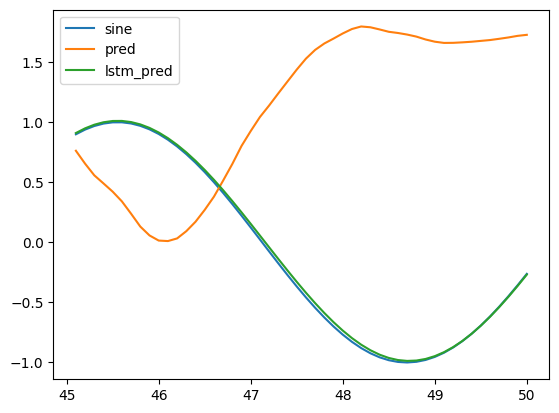

In [43]:
test.plot()

<Axes: >

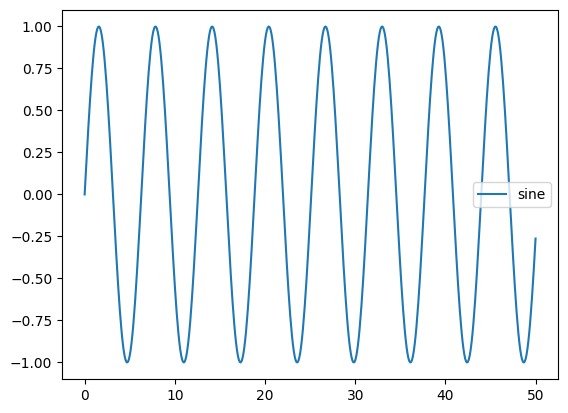

In [45]:
# Forecast

df.plot()

In [47]:
df_sc = mm.fit_transform(df)
gen_forecast = tsg(df_sc,df_sc,length = length,batch_size = 1)

In [48]:
model = Sequential()
model.add(LSTM(50,input_shape = (length,n_fea)))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mse')
# model.summary()

In [49]:
model.fit_generator(gen_forecast,epochs=9)

Epoch 1/9


<ipython-input-49-e70ce04e63f4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(gen_forecast,epochs=9)


452/452 [==============================] - 7s 12ms/step - loss: 0.0167
Epoch 2/9
452/452 [==============================] - 7s 14ms/step - loss: 1.1160e-04
Epoch 3/9
452/452 [==============================] - 6s 14ms/step - loss: 1.1220e-04
Epoch 4/9
452/452 [==============================] - 7s 15ms/step - loss: 6.7117e-05
Epoch 5/9
452/452 [==============================] - 7s 15ms/step - loss: 4.5305e-04
Epoch 6/9
452/452 [==============================] - 6s 14ms/step - loss: 6.6639e-05
Epoch 7/9
452/452 [==============================] - 6s 14ms/step - loss: 3.3022e-05
Epoch 8/9
452/452 [==============================] - 5s 12ms/step - loss: 1.5377e-05
Epoch 9/9
452/452 [==============================] - 5s 12ms/step - loss: 1.8955e-04


In [50]:
# LSTM gen

forecast = []
f_e_b = train_sc[-length:]
current_bt = f_e_b.reshape(1,length,n_fea)

for i in range(25):

  current_pred = model.predict(current_bt)[0]
  forecast.append(current_pred)
  current_bt = np.append(current_bt[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 16ms/step


In [51]:
forecast = mm.inverse_transform(forecast)

In [52]:
forecast

array([[ 0.8426149 ],
       [ 0.87094572],
       [ 0.88564124],
       [ 0.8870541 ],
       [ 0.8757237 ],
       [ 0.85217064],
       [ 0.81695483],
       [ 0.77071702],
       [ 0.71419641],
       [ 0.64823546],
       [ 0.57377865],
       [ 0.49186465],
       [ 0.40361818],
       [ 0.31024098],
       [ 0.21299881],
       [ 0.11320844],
       [ 0.01222146],
       [-0.08858969],
       [-0.18785656],
       [-0.28423393],
       [-0.37642542],
       [-0.46320998],
       [-0.54346753],
       [-0.61620354],
       [-0.68056984]])

In [53]:
forecast_index = np.arange(50.1,52.6,step=0.1)

In [54]:
len(forecast)

25

In [55]:
len(forecast_index)

25

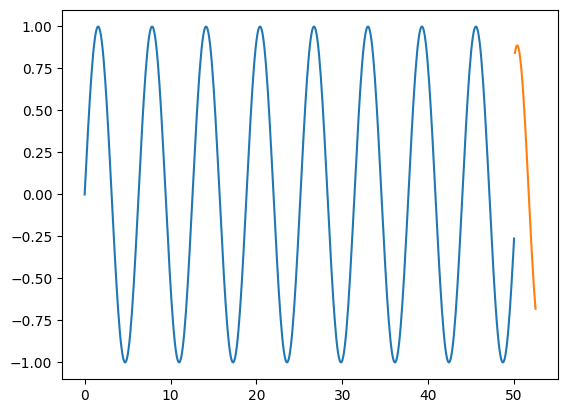

In [56]:
plt.plot(df.index,df['sine'])
plt.plot(forecast_index,forecast)